# [LEGALST 123] Project --- Are There Racial Disparities in Berkeley Police Stops? (possible to look through income relationships as well?)

Project Group: Emily Chan, KC Harris, Peter Zhang

In [97]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold
import seaborn as sns

---

## Introduction


<b>Why is this important?</b> 

---

## Getting the Data

In [5]:
berkeley_data_2015_to_2020 = pd.read_csv('Berkeley PD Stop Data 2015 to 2020.csv')
berkeley_data_2015_to_2020.head(5)

,CreateDatetime,IncidentNumber,Address,City,Lat,Lon,CallType,Race,Gender,Age,Reason,Enforcement,Car Search
0,03/24/2015 07:10:06 AM,2015-00017130,1775 SAN PABLO AVE,BERKELEY,37.871890,-122.292715,1194,Black,Male,>40,Reas. Susp.,Citation,No Search
1,03/14/2018 04:25:55 PM,2018-00015116,ANTHONY ST / 7TH ST,BERKELEY,37.852226,-122.291495,T,White,Female,30-39,Traffic,Citation,No Search
2,11/06/2016 07:15:42 AM,2016-00065741,RUSSELL ST / MABEL ST,BERKELEY,37.854113,-122.284193,1196,White,Male,>40,Investigation,Warning,No Search
3,03/06/2015 12:02:43 AM,2015-00013345,UNIVERSITY AVE / 7TH ST,BERKELEY,37.868202,-122.296625,1194,White,Male,>40,Reas. Susp.,Warning,Search
4,11/02/2017 11:16:24 PM,2017-00066848,NaN,NaN,37.860996,-122.256144,1194,White,Male,>40,Reas. Susp.,Warning,Search


In [7]:
berkeley_data_2020_to_present = pd.read_csv('Berkeley PD Stop Data 2020 to Present.csv')
berkeley_data_2020_to_present.head(5)

,LEA Record ID,Person Number,Date of Stop,Time of Stop,Duration of Stop,Is Stop Made in Response to Call for Service,Information Based Stop,Type Of Stop,Officer Type of Assignment,Location,...,Type of Property Seized,Contraband or Evidence,Other Contraband Desc,Warning Offense Codes,Citation Offense Codes,Result of Stop,In field cite and release Offense Codes,Custodial arrest Offense Codes,LAT,LONG
0,BPD000021033,1,10/01/2020,11:14,8,False,NaN,Vehicle,"Patrol, traffic enforcement, field operations",2900 block of Shattuck Ave,...,NaN,None,NaN,NaN,VC 23123(A) USE CELLPH W/DRIV W/O HFD (I) | VC...,Citation for infraction,NaN,NaN,37.855313,-122.266571
1,BPD000021032,2,10/01/2020,09:40,15,True,NaN,Pedestrian,"Patrol, traffic enforcement, field operations",3000 block of San Pablo Ave,...,NaN,None,NaN,PC 602 TRESPASSING (M),NaN,Warning (verbal or written),NaN,NaN,37.851856,-122.286553
2,BPD000021035,1,10/01/2020,14:32,60,True,NaN,Pedestrian,"Patrol, traffic enforcement, field operations",2000 block of 10th St,...,NaN,Suspected stolen property|Ammunition|Drug para...,NaN,NaN,NaN,Custodial arrest without warrant,NaN,PC 484 THEFT (M) | VC 10852 TAMPER WITH VEHICL...,37.868619,-122.293213
3,BPD000021034,1,10/01/2020,15:07,7,True,NaN,Pedestrian,"Patrol, traffic enforcement, field operations",2600 block of Durant Ave,...,NaN,Weapon(s) other than a firearm,NaN,AA 65002 LOCAL ORDINANCE VIOL (I),NaN,Warning (verbal or written),NaN,NaN,37.868025,-122.256493
4,BPD000021029,1,10/01/2020,10:15,5,False,NaN,Vehicle,"Patrol, traffic enforcement, field operations",College and Ashby,...,NaN,None,NaN,NaN,VC 22450(A) FAIL STOP VEH:XWALK/ETC (I),Citation for infraction,NaN,NaN,37.857030,-122.253055


In [1]:
import geopandas
from shapely.geometry import Point

In [7]:
berkeley = geopandas.read_file('Census Tract Polygons 2010.geojson')
stops = pd.read_csv('All_Stops.csv')

/Users/peterzhang/opt/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (1,9,14,17,18,19,20,21,22,23,24,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
berkeley['name10'][31]#.contains(Point(-122.2679364,37.86849199))

'4229'

In [16]:
berkeley
stop_point = [Point(stops['LONG'][i], stops['LAT'][i]) for i in np.arange(len(stops))]

In [27]:
tt = [berkeley['geometry'].contains(stop_point[i]) for i in np.arange(len(stop_point))]

In [58]:
judge = [np.where(tt[i] == True)[0] for i in np.arange(len(tt))]

In [75]:
tract_column = [i[0] if i.size > 0  else -1 for i in judge]
stops['tract'] = tract_column

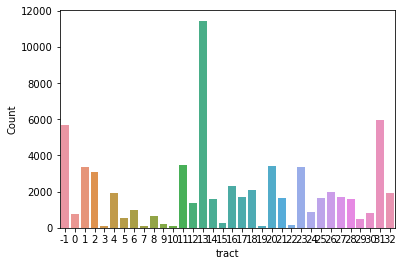

In [99]:
stop_count_per_tract = pd.DataFrame(stops.groupby('tract').count()['LAT']).rename(columns = {'LAT':'Count'}).reset_index()
sns.barplot(x = stop_count_per_tract['tract'], y = stop_count_per_tract['Count'])

In [101]:
stops.to_csv('All_Stops.csv')